In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [2]:
df = pd.read_csv('sentiment_india_data.csv')

In [15]:
datewise = defaultdict(lambda: defaultdict(lambda: {'neg': 0, 'pos':0}))
for row in df.iterrows():
    if row[1].sentiment == 0:
        datewise[row[1].state][row[1].date]['neg'] += 1
    else:
        datewise[row[1].state][row[1].date]['pos'] += 1

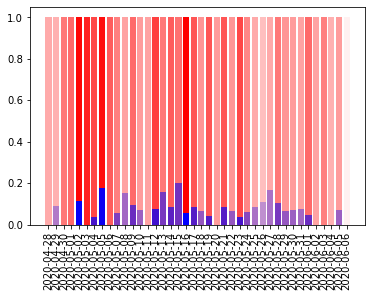

In [43]:
plt.xticks(rotation=90)
pos_list = []
neg_list = []
count = []
for data in list(datewise['Maharashtra'].values()):
    p = data['pos']
    n = data['neg']
    count.append(p+n)
    pos_list.append(p/(n+p))
    neg_list.append(n/(n+p))

max_count = max(count)
for date, p_val, n_val, count in zip(list(datewise['Maharashtra'].keys()), pos_list, neg_list, count):
    opacity = count/max_count
    plt.bar(date, 1, alpha= opacity, color = 'r')
    plt.bar(date, p_val, alpha= opacity, color = 'b')
    
# plt.bar(list(datewise['Maharashtra'].keys()), neg_list, alpha=1, color = 'r')
# plt.bar(list(datewise['Maharashtra'].keys()), pos_list, alpha=1, color = 'b')